# Explicabilidad de los Modelos de Machine Learning

### Librerias

In [61]:
from plotly.offline import plot
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import shap
import numpy as np
from sklearn import tree

### 1) Visualización Cambio de Segmento - Sankey Diagram

In [7]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 40,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Categoria_5", "Categoria_4", "Categoria_3", "Categoria_2", "Categoria_1",
               "Categoria_5", "Categoria_4", "Categoria_3", "Categoria_2", "Categoria_1"],
      color = ["red","salmon","orange","yellow","gray","red","salmon","orange","yellow","gray"] 
    ),
    link = dict(
      source = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4], # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = [5,6,7,8,9,5,6,7,8,9,5,6,7,8,9,5,6,7,8,9,5,6,7,8,9],
      value =  [72,26,0,0,1,4,80,16,1,1,0,10,74,14,1,0,1,5,93,5,5,10,15,20,35],
      color =['red','red','red','red','red',import pandas as pd
import matplotlib.pyplot as plt

              'salmon','salmon','salmon','salmon','salmon',
              'orange','orange','orange','orange','orange',
              'yellow','yellow','yellow','yellow','yellow',
              'gray','gray','gray','gray','gray']
  ))])

fig.update_layout(title_text="Cambio de Segmento - Sankey Diagram", font_size=10)
plot(fig)


'temp-plot.html'

### 2) Alineación de Series de Tiempo (Tipo Covid)

In [19]:
df = pd.read_csv('data/data_serie.csv')
df.head()

,Fecha,10708,11709,29531,98576,119517,121559,144199,188974,190618,...,320040067,320040073,320040129,320040166,320040387,320040419,320040996,320041070,320041254,320041422
0,2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,997.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-02-01,0.0,0.0,298.0,0.0,0.0,0.0,0.0,0.0,997.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-01,0.0,0.0,5882.0,0.0,0.0,0.0,0.0,0.0,1298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-01,0.0,0.0,10827.0,0.0,0.0,0.0,0.0,0.0,1298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-05-01,0.0,0.0,13694.0,0.0,0.0,0.0,0.0,0.0,1298.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Eje X - se puede elejir como uno desee, aquí simplemente enteros entre 0 y el tamaño de la data
X = range(len(df))

#Series de tiempo
data = df.iloc[:,1:]

#Encontrar el indice del primer elemento que no es cero, para cada columna
idx_nocero = data.ne(0).idxmax()

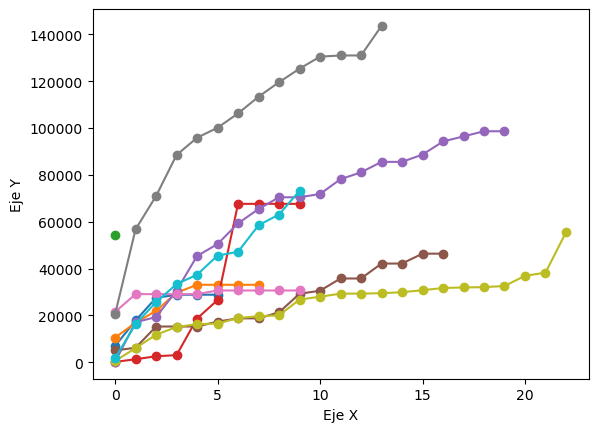

In [18]:
#EJEMPLO PARA LAS COLUMNAS 330 A 340
for col in data.columns[330:340]:
    
    idx  = idx_nocero[col]
    yvalues = data.loc[idx:,col].values
 
    if idx==0:  
        xvalues = X
    else:
        xvalues = X[:-idx]
    
    plt.plot(xvalues, yvalues,marker='o')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()


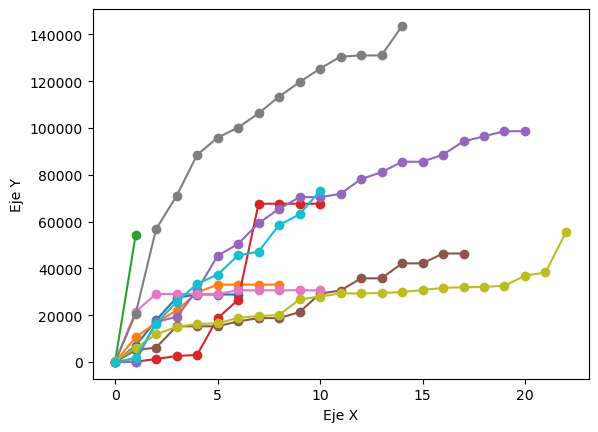

In [17]:
#O si deseas que empiecen desde cero, como en el ejemplo de Covid,
#restas un uno del indice 

for col in data.columns[330:340]:
    
    idx  = idx_nocero[col] - 1
    yvalues = data.loc[idx:,col].values
 
    if idx== -1:  
        xvalues = X
    else:
        xvalues = X[:-idx]
    
    plt.plot(xvalues, yvalues,marker='o')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()

### 3) Libreria Shap e interpretacion de modelos

Ejemplo de uso de shap para explicar un modelo simple de clasificación binaria

In [ ]:
!pip install dtreeviz

In [ ]:
!pip install shap

Importamos los datos:

In [26]:
X_train = pd.read_excel('Data/X_train.xlsx')
y_train = pd.read_csv('Data/y_train.csv')

In [27]:
X_train

,Ticket_promedio,Valor,%_trx_tarde,%_trx_noche,%_trx_mañana,%_trx_prodcat_1,%_trx_prodcat_2,%_trx_prodcat_3
0,70.0,26000.0,0.0,0.0,1.0,0.0,0.0,0.0
1,39.0,165000.0,1.0,0.0,0.0,0.0,0.0,0.0
2,204.0,163000.0,0.0,0.0,1.0,0.0,0.0,0.0
3,31.0,12000.0,1.0,0.0,0.0,0.0,0.0,0.0
4,110.0,113000.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
27658,7.0,12000.0,0.0,1.0,0.0,0.0,0.0,0.0
27659,85.0,42000.0,1.0,0.0,0.0,1.0,0.0,0.0
27660,2580.0,129000.0,0.0,1.0,0.0,0.0,0.0,0.0
27661,43.0,14000.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
y_train

,CATEGORIA
0,0
1,1
2,0
3,0
4,0
...,...
27658,0
27659,0
27660,0
27661,1


Importamos y entrenamos un modelo de arboles de decision

In [103]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### 1) Plot Tree

In [104]:
target=np.array(['Categoria_1','Categoria_2'])
target

array(['Categoria_1', 'Categoria_2'], dtype='<U11')

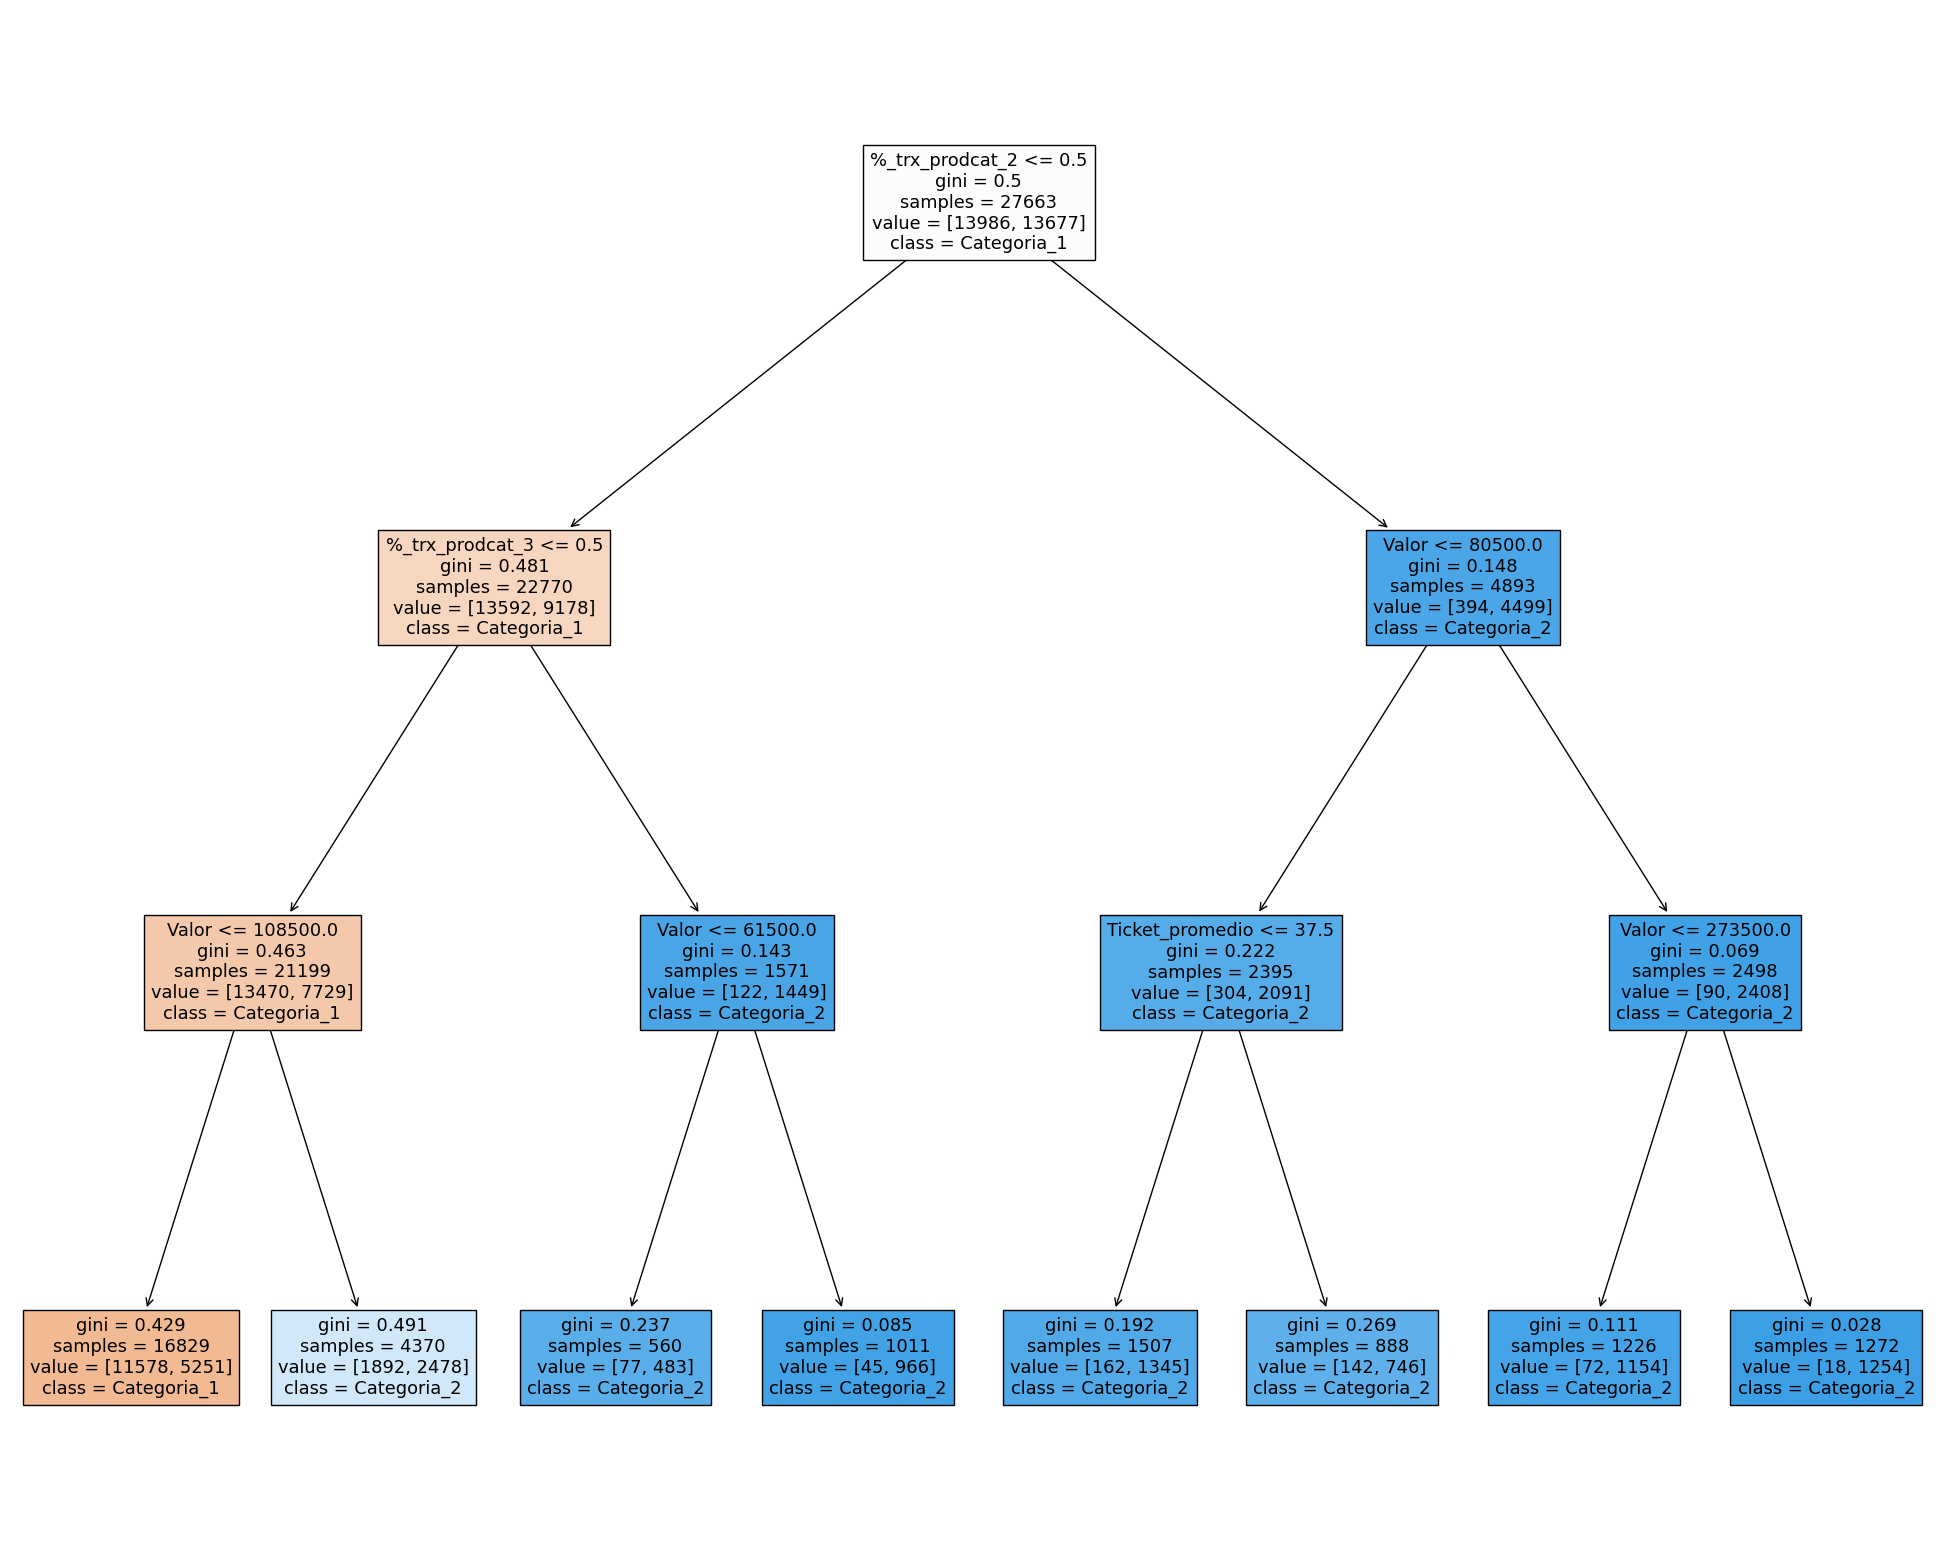

In [105]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names=target,
                   filled=True)

Usamos la libreria de SHAP para explicar el modelo previamente entrenado

In [94]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

### 2) Feauture Importance Plot

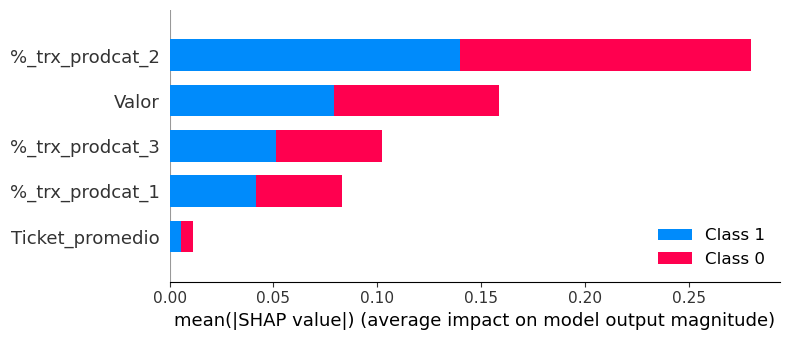

In [95]:
shap.summary_plot(shap_values, X_train, plot_type="bar", show = False, max_display = 5)

Las características están ordenadas por cuánto influyeron en la predicción del modelo. El eje x representa el promedio del valor SHAP absoluto de cada característica. 

### 3) Violin plot

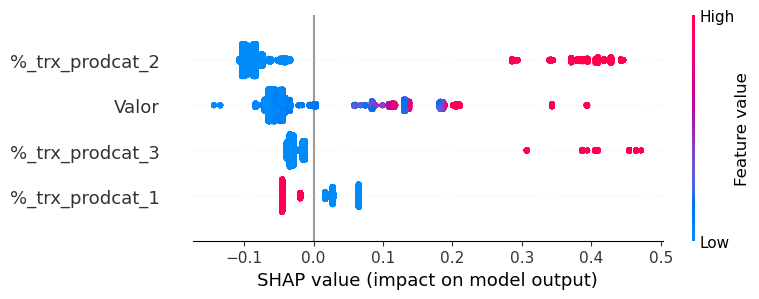

In [96]:
#Clientes Cateogiria 1
shap.summary_plot(shap_values[1], X_train, show = False, max_display = 4)

Con el mismo método summary_plot, podemos trazar gráficos de puntos para visualizar el impacto de la direccionalidad de las características. Clientes que tienen porcentaje de transaccion es de los productos tipo 2 y 3 tienen una mayor probabilidad de ser clasificados como Cliente Categoria 1.

En este gráfico, el eje x representa el valor SHAP y el eje y tiene todas las características. El color rojo significa un valor más alto de una característica. Azul significa valor más bajo de una característica. Podemos tener una idea general del impacto de la direccionalidad de las características en función de la distribución de los puntos rojos y azules.

### 4) Force Plot para la sesión individual

**Cliente Categoria 0**

In [97]:
sample = X_train.sample(n=1, random_state = 70)
sample

,Ticket_promedio,Valor,%_trx_tarde,%_trx_noche,%_trx_mañana,%_trx_prodcat_1,%_trx_prodcat_2,%_trx_prodcat_3
16330,64.0,12000.0,0.0,1.0,0.0,1.0,0.0,0.0


In [98]:
sample_y = y_train.loc[sample.index]
sample_y

,CATEGORIA
16330,0


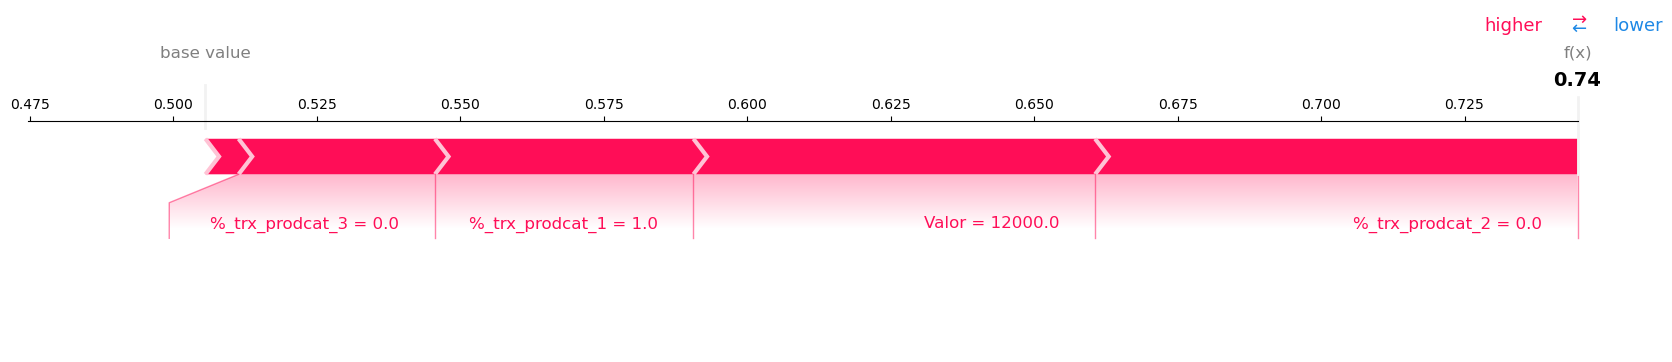

In [99]:
shap.force_plot(base_value = explainer.expected_value[0], 
                    shap_values= shap_values[0][sample.index[0]], 
                    features = sample,
                    matplotlib = True)

Podemos verificar que el valor "Model output value" del plot corresponde a la predicción del modelo, es decir, 74% de pertencia a la clase 0 y 26 % de pertencia a la clase 1

In [100]:
clf.predict_proba(sample)

array([[0.74469369, 0.25530631]])

El valor "Base value" del plot corresponde al promedio de predecir sobre toda la data:

In [101]:
np.mean(clf.predict_proba(X_train), axis = 0)

array([0.50558508, 0.49441492])

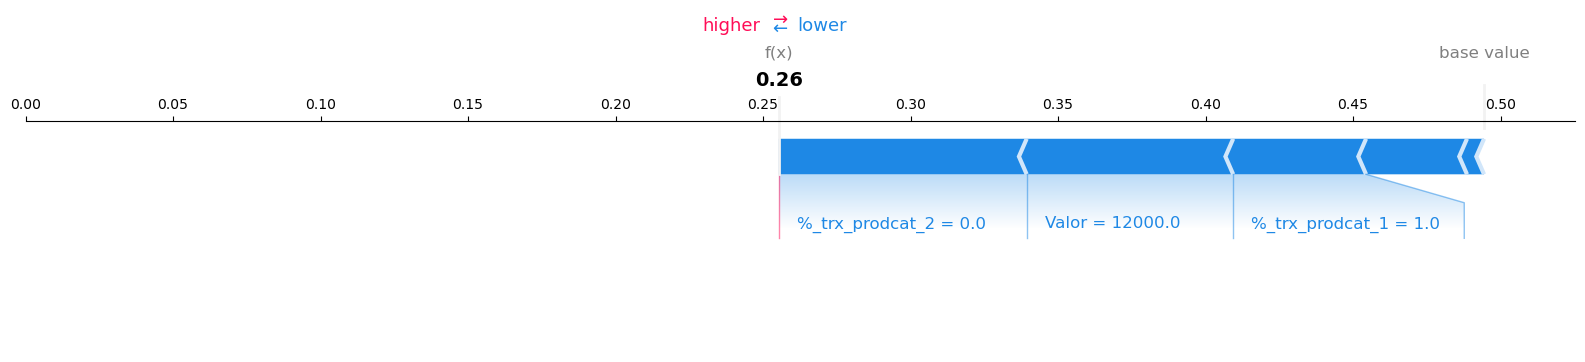

In [102]:
shap.force_plot(base_value = explainer.expected_value[1], 
                    shap_values= shap_values[1][sample.index[0]], 
                    features = sample,
                    matplotlib = True)

Al ser un problema de clasificación binario, el force plot para la otra clase es el reflejo del plot anterior. Los atributos que aumentan la probabilidad de ser cliente de categoria 0, al mismo tiempo disminuyen la probabilidad de ser de la categoria 1.